In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
!pip install --upgrade pip
!pip install --upgrade setuptools wheel
!pip install --upgrade "mxnet<2.0.0"
!pip install pydeseq2
!pip install adjustText
!pip install scanpy

In [3]:
import pandas as pd
from pathlib import Path

DATA = Path("/content/drive/My Drive/F23/ECBME4060/data/project")


#Mutual Exclusivity Analysis

# Binary Matrix Construction

In [4]:
import pandas as pd
import scanpy as sc

# Import the data
datamutations = pd.read_csv(DATA / "data_mutationslaml.txt", sep='\t')

# Get unique patients and genes
patients = datamutations['Tumor_Sample_Barcode'].unique()[0:]
numpatients = len(patients)
genes = datamutations['Hugo_Symbol'].unique()[0:]
numgenes = len(genes)

# Create a binary matrix
binarymatrix = pd.DataFrame(0, index=patients, columns=genes)

# Populate the binary matrix
for i in range(1, len(datamutations)):
    gene = datamutations.loc[i, 'Hugo_Symbol']
    patient = datamutations.loc[i, 'Tumor_Sample_Barcode']

    if gene in genes and patient in patients:
        binarymatrix.loc[patient, gene] = 1

<ipython-input-4-aeb6c43c5653>:5: DtypeWarning: Columns (33,34,35,36,45) have mixed types. Specify dtype option on import or set low_memory=False.
  datamutations = pd.read_csv(DATA / "data_mutationslaml.txt", sep='\t')


In [5]:
binarymatrix.head()

,TBX15,TCHHL1,DNMT3A,IDH1,GRM7,ANKRD30A,KRT74,PTPN11,EP400,RP11-815J4.6,...,ACAA1,POLR2B,CDKL3,ERBB2IP,PLAA,APOOL,PCSK2,C4orf29,CLEC7A,CALCR
TCGA-AB-2802-03,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
TCGA-AB-2803-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AB-2804-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AB-2805-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AB-2806-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(binarymatrix.shape)

(199, 6427)


In [ ]:
pip install numpy scipy statsmodels

# Differential Expression Analysis

In [8]:
import pandas as pd

counts = pd.read_csv(DATA / "tcga_laml_raw_count.txt")

In [9]:
counts

,TCGA-AB-2872-03A-01T-0735-13,TCGA-AB-2990-03B-01T-0748-13,TCGA-AB-2825-03A-01T-0736-13,TCGA-AB-2812-03A-01T-0734-13,TCGA-AB-2838-03A-01T-0736-13,TCGA-AB-2948-03A-01T-0740-13,TCGA-AB-2849-03A-01T-0734-13,TCGA-AB-2943-03A-01T-0740-13,TCGA-AB-2952-03B-01T-0760-13,TCGA-AB-2896-03B-01T-0751-13,...,TCGA-AB-2921-03A-01T-0740-13,TCGA-AB-3011-03A-01T-0736-13,TCGA-AB-2885-03A-01T-0735-13,TCGA-AB-2985-03A-01T-0734-13,TCGA-AB-2929-03A-01T-0735-13,TCGA-AB-2978-03A-01T-0734-13,TCGA-AB-2821-03A-01T-0735-13,TCGA-AB-2897-03A-01T-0735-13,TCGA-AB-2994-03A-01T-0735-13,TCGA-AB-2975-03A-01T-0734-13
BX004987.1,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
AC145212.2,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
AC145212.1,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
Y_RNA,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
AC011043.1,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IL9R,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
WASIR1,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
AJ271736.10,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
WASH6P,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0


In [10]:
countst = counts.T
countst.head()

,BX004987.1,AC145212.2,AC145212.1,Y_RNA,AC011043.1,AC011043.2,Y_RNA,AC011841.1,KIR3DL2,KIR2DS1,...,AMD1P2,DPH3P2,VAMP7,ELOCP24,TRPC6P,IL9R,WASIR1,AJ271736.10,WASH6P,DDX11L16
TCGA-AB-2872-03A-01T-0735-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AB-2990-03B-01T-0748-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AB-2825-03A-01T-0736-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AB-2812-03A-01T-0734-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AB-2838-03A-01T-0736-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
!pip install rpy2

In [12]:
import os
import pickle as pkl

from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

print("Binary Matrix Index:", binarymatrix.index)
print("Counts Index:", countst.index)

common_samples = binarymatrix.index.intersection(countst.index)
binarymatrix_commonsamps = binarymatrix.loc[common_samples, :]
rawcounts = countst.loc[common_samples, :]
binarymatrix_tp53=binarymatrix['TP53']
countst_index_subset = [index[:15] for index in countst.index.values]

# Filter binarymatrix_tp53 based on the index in countst
countst = countst[countst.index.str[:15].isin(binarymatrix_tp53.index)]
binarymatrix_tp53_filt = binarymatrix_tp53[binarymatrix_tp53.index.isin(countst_index_subset)]
list_data = {'Condition':[ 'Mutated TP53' if i == 1 else "Wild-Type TP53" for i in binarymatrix_tp53_filt],
                  'Patient':  [ i for i in binarymatrix_tp53_filt.index]} #fix
df_data = pd.DataFrame(list_data, index=countst.index.values.tolist()) #fix
df_data.head()

Binary Matrix Index: Index(['TCGA-AB-2802-03', 'TCGA-AB-2803-03', 'TCGA-AB-2804-03',
       'TCGA-AB-2805-03', 'TCGA-AB-2806-03', 'TCGA-AB-2807-03',
       'TCGA-AB-2808-03', 'TCGA-AB-2809-03', 'TCGA-AB-2810-03',
       'TCGA-AB-2811-03',
       ...
       'TCGA-AB-3002-03', 'TCGA-AB-3005-03', 'TCGA-AB-3006-03',
       'TCGA-AB-3007-03', 'TCGA-AB-3008-03', 'TCGA-AB-3009-03',
       'TCGA-AB-3011-03', 'TCGA-AB-3012-03', 'TCGA-AB-2815-03',
       'TCGA-AB-2944-03'],
      dtype='object', length=199)
Counts Index: Index(['TCGA-AB-2872-03A-01T-0735-13', 'TCGA-AB-2990-03B-01T-0748-13',
       'TCGA-AB-2825-03A-01T-0736-13', 'TCGA-AB-2812-03A-01T-0734-13',
       'TCGA-AB-2838-03A-01T-0736-13', 'TCGA-AB-2948-03A-01T-0740-13',
       'TCGA-AB-2849-03A-01T-0734-13', 'TCGA-AB-2943-03A-01T-0740-13',
       'TCGA-AB-2952-03B-01T-0760-13', 'TCGA-AB-2896-03B-01T-0751-13',
       ...
       'TCGA-AB-2921-03A-01T-0740-13', 'TCGA-AB-3011-03A-01T-0736-13',
       'TCGA-AB-2885-03A-01T-0735-13', 'TCGA-A

,Condition,Patient
TCGA-AB-2872-03A-01T-0735-13,Wild-Type TP53,TCGA-AB-2803-03
TCGA-AB-2990-03B-01T-0748-13,Wild-Type TP53,TCGA-AB-2805-03
TCGA-AB-2825-03A-01T-0736-13,Wild-Type TP53,TCGA-AB-2806-03
TCGA-AB-2812-03A-01T-0734-13,Wild-Type TP53,TCGA-AB-2807-03
TCGA-AB-2838-03A-01T-0736-13,Wild-Type TP53,TCGA-AB-2808-03


In [13]:
duplicate_indices = countst[countst.index.duplicated(keep=False)].index
print("Duplicate Indices:", duplicate_indices)
# Option 1: Drop duplicates
countst = countst[~countst.index.duplicated(keep='first')]
countst_filtered = countst[countst.sum(axis=1) >= 1]

Duplicate Indices: Index([], dtype='object')


In [14]:
df_data = df_data[~df_data.index.duplicated(keep='first')]
countst_filtered = countst_filtered[~countst_filtered.index.duplicated(keep='first')]
countst_filtered = countst_filtered.loc[:, ~countst_filtered.columns.duplicated()]


In [15]:
df_data.shape


(177, 2)

In [16]:
countst_filtered.shape

(177, 56937)

In [17]:
dds = DeseqDataSet(
    counts=countst_filtered,
    metadata=df_data,
    design_factors="Condition",
    refit_cooks=True,
   # n_cpus=1,
)

In [18]:
dds.obs_names_make_unique


<bound method AnnData.obs_names_make_unique of AnnData object with n_obs × n_vars = 177 × 56937
    obs: 'Condition', 'Patient'
    obsm: 'design_matrix'>

In [19]:
dds.var_names_make_unique

<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 177 × 56937
    obs: 'Condition', 'Patient'
    obsm: 'design_matrix'>

In [20]:
dds.deseq2()

Fitting size factors...
... done in 1.25 seconds.

Fitting dispersions...
... done in 155.70 seconds.

Fitting dispersion trend curve...
... done in 6.76 seconds.

Fitting MAP dispersions...
... done in 164.47 seconds.

Fitting LFCs...
... done in 139.02 seconds.

Refitting 15712 outliers.

Fitting dispersions...
... done in 32.48 seconds.

Fitting MAP dispersions...
... done in 26.94 seconds.

Fitting LFCs...
... done in 54.53 seconds.

/usr/local/lib/python3.10/dist-packages/pydeseq2/dds.py:1019: ImplicitModificationWarning: Setting element `.varm['_normed_means']` of view, initializing view as actual.
  self[:, self.new_all_zeroes_genes].varm["_normed_means"] = np.zeros(
/usr/local/lib/python3.10/dist-packages/pydeseq2/dds.py:1022: ImplicitModificationWarning: Setting element `.varm['LFC']` of view, initializing view as actual.
  self[:, self.new_all_zeroes_genes].varm["LFC"] = np.zeros(


In [21]:
dds.calculate_cooks()
dds.refit()

Refitting 15712 outliers.

Fitting dispersions...
... done in 30.21 seconds.

Fitting MAP dispersions...
... done in 29.08 seconds.

Fitting LFCs...
... done in 57.40 seconds.

/usr/local/lib/python3.10/dist-packages/pydeseq2/dds.py:1019: ImplicitModificationWarning: Setting element `.varm['_normed_means']` of view, initializing view as actual.
  self[:, self.new_all_zeroes_genes].varm["_normed_means"] = np.zeros(
/usr/local/lib/python3.10/dist-packages/pydeseq2/dds.py:1022: ImplicitModificationWarning: Setting element `.varm['LFC']` of view, initializing view as actual.
  self[:, self.new_all_zeroes_genes].varm["LFC"] = np.zeros(


In [22]:
stat_res = DeseqStats(dds, alpha=0.05)
stat_res.run_wald_test()
stat_res._p_value_adjustment()

Running Wald tests...
... done in 21.51 seconds.



In [23]:
df_results=stat_res.summary()

Log2 fold change & Wald test p-value: Condition Wild-Type TP53 vs Mutated TP53
              baseMean  log2FoldChange     lfcSE      stat    pvalue  padj
BX004987.1    0.000000             NaN       NaN       NaN       NaN   NaN
AC145212.2    0.000000             NaN       NaN       NaN       NaN   NaN
AC145212.1    0.000000             NaN       NaN       NaN       NaN   NaN
Y_RNA         0.000000             NaN       NaN       NaN       NaN   NaN
AC011043.1    0.000000             NaN       NaN       NaN       NaN   NaN
...                ...             ...       ...       ...       ...   ...
CYCSP49       0.275554        0.939597  5.256789  0.178740  0.858142   1.0
TPTE2P4      69.188551        0.148440  0.770373  0.192686  0.847205   1.0
SLC25A15P1   16.287079        0.215332  2.224455  0.096802  0.922884   1.0
FAM58CP     137.030100        0.509702  0.750744  0.678929  0.497183   1.0
PARP4P1     518.561871       -0.072951  0.619390 -0.117779  0.906243   1.0

[56937 rows x 6 colu

In [24]:
stat_res.LFC

,intercept,Condition_Wild-Type TP53_vs_Mutated TP53
BX004987.1,NaN,NaN
AC145212.2,NaN,NaN
AC145212.1,NaN,NaN
Y_RNA,NaN,NaN
AC011043.1,NaN,NaN
...,...,...
CYCSP49,-1.688742,0.651279
TPTE2P4,4.142106,0.102891
SLC25A15P1,2.652599,0.149256
FAM58CP,4.592355,0.353298


In [25]:
res_pdDF = pd.DataFrame({'lfc':stat_res.LFC['Condition_Wild-Type TP53_vs_Mutated TP53'],
                      'padj':stat_res.padj
                      })
res_pdDF.index = stat_res.LFC.index
sorted_padj = res_pdDF.sort_values(by='padj')
sorted_padj.head(10)

,lfc,padj
CTD-2006M22.2,30.000000,3.366265e-24
RNA5SP233,30.000000,8.162843e-22
SMPDL3A,2.544378,7.778655e-05
LDLRAD3,2.118910,3.604671e-04
STK33,2.225901,6.689352e-04
PKP2,2.740740,7.839507e-04
MMP8,2.585068,9.957684e-04
OR7D2,2.317245,1.131677e-03
GABRE,3.454462,1.191002e-03
MEG3,2.944232,1.225007e-03


In [26]:
sig_genes = sorted_padj[sorted_padj['padj']<=0.05]
textfile = 'sig_genes.txt'
sig_genes.to_csv(textfile, sep='\t', index=False)
sig_genes

,lfc,padj
CTD-2006M22.2,30.000000,3.366265e-24
RNA5SP233,30.000000,8.162843e-22
SMPDL3A,2.544378,7.778655e-05
LDLRAD3,2.118910,3.604671e-04
STK33,2.225901,6.689352e-04
...,...,...
RPSAP24,4.997299,4.934608e-02
LL22NC03-104C7.1,4.954091,4.934608e-02
RHBDL3,1.425166,4.934728e-02
BPI,1.573223,4.944398e-02


In [27]:
sig_genes_mut=sig_genes[sig_genes["lfc"]<0]
sig_genes_mut.head(10)

,lfc,padj
PCSK6,-1.136696,0.001668
CHML,-0.561810,0.002166
RP11-299G20.2,-1.144043,0.002427
ABCA6,-1.495878,0.003460
FGF7,-1.531435,0.004554
SLC38A4,-1.263317,0.005492
BMS1P10,-1.277066,0.007096
CACNA1D,-0.699177,0.008837
RP11-158G18.1,-1.340448,0.014727
RP11-474P2.6,-0.787344,0.014845


In [28]:
sig_genes_mut.shape

(26, 2)

In [29]:
sig_genes_wt=sig_genes[sig_genes["lfc"]>0]
sig_genes_wt.head(10)

,lfc,padj
CTD-2006M22.2,30.000000,3.366265e-24
RNA5SP233,30.000000,8.162843e-22
SMPDL3A,2.544378,7.778655e-05
LDLRAD3,2.118910,3.604671e-04
STK33,2.225901,6.689352e-04
PKP2,2.740740,7.839507e-04
MMP8,2.585068,9.957684e-04
OR7D2,2.317245,1.131677e-03
GABRE,3.454462,1.191002e-03
MEG3,2.944232,1.225007e-03


In [30]:
sig_genes_wt.shape

(262, 2)

# Code Belows are for Figures:

In [ ]:
!pip install gspread-pandas

In [32]:
from google.colab import auth
auth.authenticate_user()
import gspread_pandas
from google.auth import default
import pandas as pd
creds, _ = default()

In [33]:
spread = gspread_pandas.Spread('significant genes', creds=creds, create_spread=True)
spread.df_to_sheet(sig_genes, index=True, headers=True, start='A1',)

In [34]:
spread_wt = gspread_pandas.Spread('significant genes wt (upregulated)', creds=creds, create_spread=True)
spread_wt.df_to_sheet(sig_genes_wt, index=True, headers=True, start='A1',)

In [35]:
spread_mut = gspread_pandas.Spread('significant genes mut (downregulated)', creds=creds, create_spread=True)
spread_mut.df_to_sheet(sig_genes_mut, index=True, headers=True, start='A1',)

# Plotting Volcano Plots

In [36]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [37]:
df_de = pd.DataFrame({'lfc':stat_res.LFC['Condition_Wild-Type TP53_vs_Mutated TP53'],
                      'padj':stat_res.padj.apply(lambda x:-np.log10(x))
                      })
df_de.index = stat_res.LFC.index

In [38]:
df_de_nonan = df_de[df_de.padj.notna()]
index_names_to_remove = ['CTD-2006M22.2', 'RNA5SP233']
df_de_nonan_rmtop2 = df_de_nonan.drop(index_names_to_remove, axis=0)

In [39]:
spread_all = gspread_pandas.Spread('alldata', creds=creds, create_spread=True)
spread_all.df_to_sheet(df_de_nonan, index=True, headers=True, start='A1',)

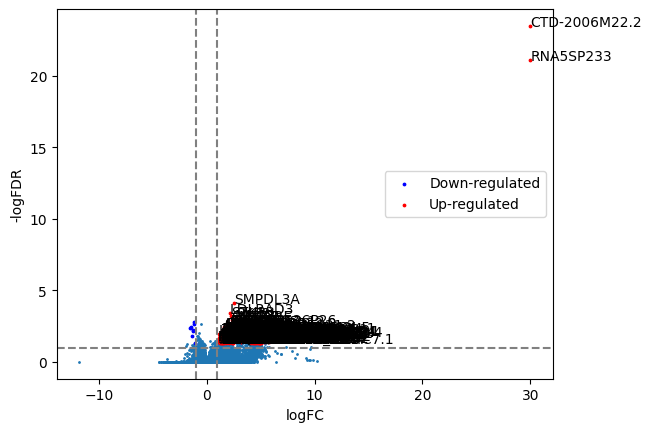

In [40]:
from adjustText import adjust_text

plt.scatter(x=df_de_nonan['lfc'], y=df_de_nonan['padj'], s=1)

# highlight down- or up- regulated genes
down = df_de_nonan[(df_de_nonan['lfc']<=-1)&(df_de_nonan['padj']>=1.3)]
up = df_de_nonan[(df_de_nonan['lfc']>1)&(df_de_nonan['padj']>=1.3)]

plt.scatter(x=down['lfc'],y=down['padj'],s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['lfc'],y=up['padj'],s=3,label="Up-regulated",color="red")


texts=[]
for i,r in up.iterrows():
    texts.append(plt.text(x=r['lfc'],y=r['padj'],s=i))

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-1,color="grey",linestyle="--")
plt.axvline(1,color="grey",linestyle="--")
plt.axhline(1,color="grey",linestyle="--")
plt.legend()

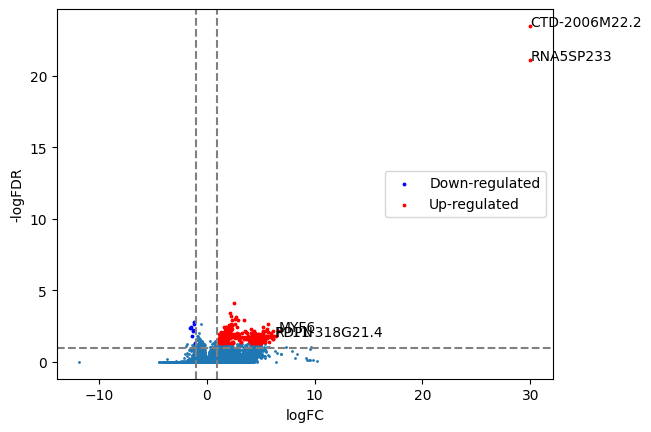

In [41]:
from adjustText import adjust_text

plt.scatter(x=df_de_nonan['lfc'], y=df_de_nonan['padj'], s=1)

# highlight down- or up- regulated genes
down = df_de_nonan[(df_de_nonan['lfc']<=-1)&(df_de_nonan['padj']>=1.3010)]
up_2 = df_de_nonan[(df_de_nonan['lfc']>1)&(df_de_nonan['padj']>=1.3010)].sort_values(by='lfc', ascending=False)

plt.scatter(x=down['lfc'],y=down['padj'],s=3,label="Down-regulated",color="blue")
plt.scatter(x=up_2['lfc'],y=up_2['padj'],s=3,label="Up-regulated",color="red")


texts=[]
for i,r in up_2.iterrows():
    texts.append(plt.text(x=r['lfc'],y=r['padj'],s=i))
      # Add a counter to break the loop after the first 20 rows
    if len(texts) == 5:
        break

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-1,color="grey",linestyle="--")
plt.axvline(1,color="grey",linestyle="--")
plt.axhline(1,color="grey",linestyle="--")
plt.legend()

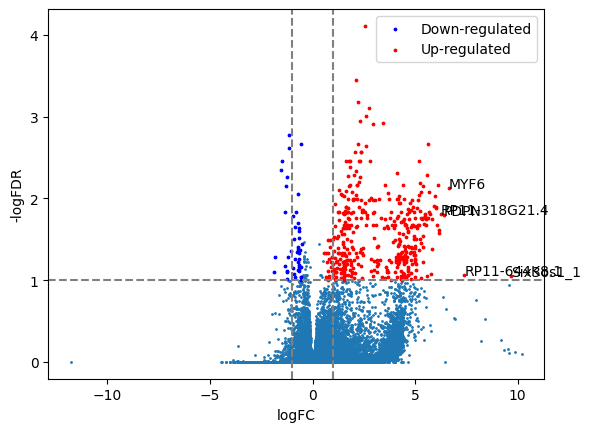

In [42]:
from adjustText import adjust_text

plt.scatter(x=df_de_nonan_rmtop2['lfc'], y=df_de_nonan_rmtop2['padj'], s=1)

# highlight down- or up- regulated genes
down = df_de_nonan_rmtop2[(df_de_nonan_rmtop2['lfc']<=-0.5)&(df_de_nonan_rmtop2['padj']>=1)]
up = df_de_nonan_rmtop2[(df_de_nonan_rmtop2['lfc']>0.5)&(df_de_nonan_rmtop2['padj']>=1)].sort_values(by='lfc', ascending=False)


plt.scatter(x=down['lfc'],y=down['padj'],s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['lfc'],y=up['padj'],s=3,label="Up-regulated",color="red")

texts = []
for i, r in up.iterrows():
    texts.append(plt.text(x=r['lfc'], y=r['padj'], s=i))

    # Add a counter to break the loop after the first 20 rows
    if len(texts) == 5:
        break

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-1,color="grey",linestyle="--")
plt.axvline(1,color="grey",linestyle="--")
plt.axhline(1,color="grey",linestyle="--")
plt.legend()

In [43]:
pip install pandas seaborn


# Heat map

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
count_heat = countst_filtered.T
count_heat = count_heat[count_heat.index.isin(sig_genes.index)]
#count_heat['mean'] = count_heat.mean(axis=1)
#count_heat['std_dev'] = count_heat.std(axis=1)

#z_score_df = (count_heat.sub(count_heat['mean'], axis=0)).div(count_heat['std_dev'], axis=0)

# If you want to drop the mean and std columns from the resulting dataframe
#z_score_df = z_score_df.drop(columns=['mean', 'std_dev'])
sorted_index = list(sig_genes_wt.index) + list(sig_genes_mut.index)

# Reorder the index of z_score_df
count_heat = count_heat.reindex(sorted_index)

In [50]:
condition_mapping = {'Wild-Type TP53': 0, 'Mutated TP53': 1}

# Add a temporary column in df_data with numeric values based on the condition_mapping
df_data['condition_numeric'] = df_data['Condition'].map(condition_mapping)

# Sort the columns of z_score_df based on the condition_numeric values in df_data
sorted_columns = sorted(count_heat.columns, key=lambda x: df_data.loc[x, 'condition_numeric'])

# Reorder the columns of z_score_df
count_heat = count_heat[sorted_columns]

# Drop the temporary column from df_data
df_data = df_data.drop(columns=['condition_numeric'])


In [55]:
count_heat

,TCGA-AB-2872-03A-01T-0735-13,TCGA-AB-2990-03B-01T-0748-13,TCGA-AB-2825-03A-01T-0736-13,TCGA-AB-2812-03A-01T-0734-13,TCGA-AB-2838-03A-01T-0736-13,TCGA-AB-2948-03A-01T-0740-13,TCGA-AB-2849-03A-01T-0734-13,TCGA-AB-2943-03A-01T-0740-13,TCGA-AB-2896-03B-01T-0751-13,TCGA-AB-2893-03A-01T-0734-13,...,TCGA-AB-2970-03A-01T-0734-13,TCGA-AB-2979-03B-01T-0760-13,TCGA-AB-2901-03A-01T-0735-13,TCGA-AB-2834-03A-01T-0734-13,TCGA-AB-2918-03A-01T-0740-13,TCGA-AB-2998-03A-01T-0735-13,TCGA-AB-2944-03A-01T-0740-13,TCGA-AB-2959-03A-01T-0734-13,TCGA-AB-2861-03A-01T-0736-13,TCGA-AB-2955-03A-01T-0734-13
CTD-2006M22.2,198.0,0.0,0.0,0.0,200.0,0.0,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
RNA5SP233,49.0,124.0,0.0,100.0,0.0,100.0,469.0,0.0,0.0,380.0,...,69.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
SMPDL3A,680.0,4910.0,29498.0,348.0,8428.0,69149.0,3647.0,11016.0,2012.0,35984.0,...,1351.0,187.0,100.0,2713.0,64.0,88.0,670.0,691.0,19376.0,497.0
LDLRAD3,1971.0,73637.0,407834.0,34432.0,59675.0,111207.0,102325.0,11002.0,9311.0,325660.0,...,9841.0,1381.0,8331.0,9116.0,7839.0,549.0,16149.0,1000.0,309361.0,3762.0
STK33,647.0,11235.0,3786.0,3461.0,26153.0,9349.0,16643.0,2264.0,4930.0,1648.0,...,300.0,400.0,373.0,579.0,138.0,457.0,250.0,1081.0,743.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUMO4,5665.0,3351.0,2218.0,2549.0,5266.0,7055.0,6091.0,4258.0,2051.0,2354.0,...,6483.0,2218.0,9872.0,5475.0,3765.0,4181.0,7143.0,33080.0,1063.0,11989.0
MARK3P1,2144.0,104.0,629.0,50.0,350.0,240.0,716.0,1342.0,1337.0,300.0,...,2288.0,991.0,1631.0,314.0,2218.0,932.0,1590.0,2405.0,350.0,16473.0
VPS13B,503426.0,357788.0,421769.0,480115.0,605573.0,532154.0,750700.0,532948.0,514599.0,230397.0,...,502517.0,409090.0,862208.0,316986.0,793469.0,405135.0,573044.0,904819.0,466964.0,949627.0
RP4-583P15.14,17351.0,23979.0,9402.0,9397.0,14368.0,28570.0,20196.0,56119.0,21183.0,8747.0,...,44790.0,391968.0,8986.0,13593.0,45295.0,19486.0,39904.0,7569.0,14087.0,31495.0


In [68]:
df_mut = df_data[df_data['Condition']=='Mutated TP53']

count_heat_log10 = np.log10(count_heat)

count_heat_log10

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


,TCGA-AB-2872-03A-01T-0735-13,TCGA-AB-2990-03B-01T-0748-13,TCGA-AB-2825-03A-01T-0736-13,TCGA-AB-2812-03A-01T-0734-13,TCGA-AB-2838-03A-01T-0736-13,TCGA-AB-2948-03A-01T-0740-13,TCGA-AB-2849-03A-01T-0734-13,TCGA-AB-2943-03A-01T-0740-13,TCGA-AB-2896-03B-01T-0751-13,TCGA-AB-2893-03A-01T-0734-13,...,TCGA-AB-2970-03A-01T-0734-13,TCGA-AB-2979-03B-01T-0760-13,TCGA-AB-2901-03A-01T-0735-13,TCGA-AB-2834-03A-01T-0734-13,TCGA-AB-2918-03A-01T-0740-13,TCGA-AB-2998-03A-01T-0735-13,TCGA-AB-2944-03A-01T-0740-13,TCGA-AB-2959-03A-01T-0734-13,TCGA-AB-2861-03A-01T-0736-13,TCGA-AB-2955-03A-01T-0734-13
CTD-2006M22.2,2.296665,-inf,-inf,-inf,2.301030,-inf,2.000000,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,2.000000,-inf,-inf
RNA5SP233,1.690196,2.093422,-inf,2.000000,-inf,2.000000,2.671173,-inf,-inf,2.579784,...,1.838849,-inf,-inf,-inf,-inf,0.000000,-inf,-inf,-inf,-inf
SMPDL3A,2.832509,3.691081,4.469793,2.541579,3.925725,4.839786,3.561936,4.042024,3.303628,4.556109,...,3.130655,2.271842,2.000000,3.433450,1.806180,1.944483,2.826075,2.839478,4.287264,2.696356
LDLRAD3,3.294687,4.867096,5.610483,4.536962,4.775792,5.046132,5.009982,4.041472,3.968996,5.512764,...,3.993039,3.140194,3.920697,3.959804,3.894261,2.739572,4.208146,3.000000,5.490466,3.575419
STK33,2.810904,4.050573,3.578181,3.539202,4.417522,3.970765,4.221232,3.354876,3.692847,3.216957,...,2.477121,2.602060,2.571709,2.762679,2.139879,2.659916,2.397940,3.033826,2.870989,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUMO4,3.753200,3.525174,3.345962,3.406370,3.721481,3.848497,3.784689,3.629206,3.311966,3.371806,...,3.811776,3.345962,3.994405,3.738384,3.575765,3.621280,3.853881,4.519566,3.026533,4.078783
MARK3P1,3.331225,2.017033,2.798651,1.698970,2.544068,2.380211,2.854913,3.127753,3.126131,2.477121,...,3.359456,2.996074,3.212454,2.496930,3.345962,2.969416,3.201397,3.381115,2.544068,4.216773
VPS13B,5.701936,5.553626,5.625075,5.681345,5.782167,5.726037,5.875466,5.726685,5.711469,5.362477,...,5.701151,5.611819,5.935612,5.501040,5.899530,5.607600,5.758188,5.956562,5.669283,5.977553
RP4-583P15.14,4.239325,4.379831,3.973220,3.972989,4.157396,4.455910,4.305265,4.749110,4.325987,3.941859,...,4.651181,5.593251,3.953566,4.133315,4.656050,4.289723,4.601016,3.879039,4.148819,4.498242


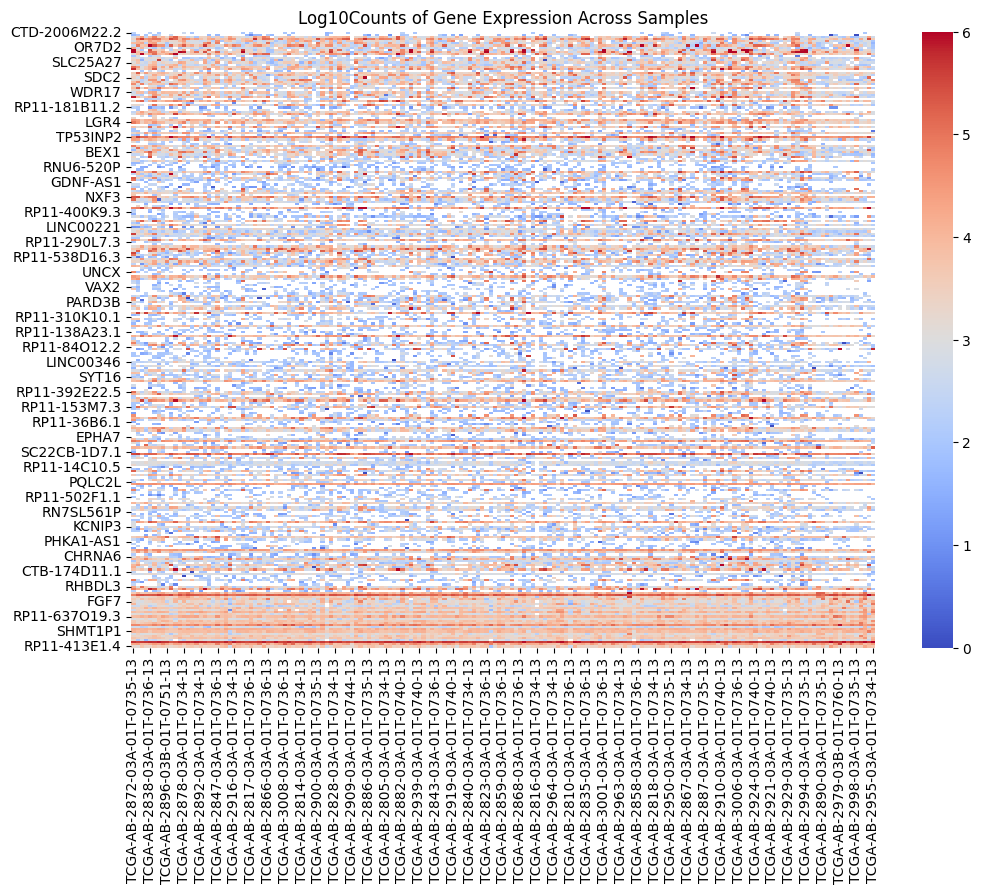

In [72]:
# Create a heatmap of z-scores
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator
plt.figure(figsize=(12, 8))
sns.heatmap(count_heat_log10, cmap="coolwarm", annot=False, fmt=".2f", vmin=0, vmax=6)
plt.title('Log10Counts of Gene Expression Across Samples')
plt.show()